# Scrutinizing the Fake Job Postings Posted Between 2012 and 2014

-By Jaykumar Prajapati

## A. Introduction

In this project, I aim at scrutinizing the relationship between fake job postings and several details on the job ads. These ad details are:

1. if the ad has screening questions.
2. employment type (full-time, part-time, temporary, other).
3. if the job is remote.
4. amount of missing details. 

### A.1 Context

We encounter many fake job postings through various means such as online job portals, spam emails, spam calls, newspaper ads, etc. But, it can be difficult to differentiate between a legitimate and a fake ad. Often desperate people fall into these traps and lose money and personal information such as bank account numbers, social security numbers, phone numbers, etc. 

With this project, I want to explore my curiosity about the relationship between the authenticity of a job ad and:

**1. Presence of screening questions:**  
Often, the fake job ads skip the part of screening questions to quicken the hiring process and gather the details of a person as fast as possible.


**2. Employment type:**  
Fraudsters lure people into the fraud by the greed of extra money. Extra money is either greed or need for someone. So, the fraudulent job ads are mostly part-time. If not and the job is full-time, it maybe a high paying one at entry level. Suspicious, right?


**3. Remoteness of the job:**  
Fake remote jobs are also in news because the remoteness of the job attracts people by not requiring to commute. Peopl think of this as a good opportunity for making a few bucks at home.

**4. Amount of missing details:**  
In most cases, fake job ads do not contain much information and just sound like "Urgently required! Competitive pay. No experience needed. Contact#: ...". It is suspicious that the experience is not needed. This makes me wonder who their target audience is.

## B. The Dataset

The dataset I used is a publicly available dataset called Employment Scam Aegean Dataset or _EMSCAD_ (Link [here](http://emscad.samos.aegean.gr/)). EMSCAD is hosted by the Laboratory of Information & Communication System Security at the University of the Aegean. According to their official documentation, the dataset contains 17,014 legititmate and 866 fake jobs posted between 2012 and 2014.

### B.1 Dataset Description

This dataset description is in accordance with the description given on the official page (Link [here](http://emscad.samos.aegean.gr/) again). 

**String type:**

 * **Title:** The title of the job ad entry.
 * **Location:** Geographical location of the job ad.
 * **Department:** Corporate department.
 * **Salary range:** Indicative salary range.
 
**HTML Fragment:**

 * **Company Profile:** A brief company description.
 * **Description:** The details description of the job ad.
 * **Requirements:** Enlisted requirements for the job opening.
 * **Benefits:** Enlisted offered benefits by the employer.
 
**Binary**

 * **Telecommuting:** True for telecommuting positions.
 * **Company logo:** True if company has a logo.
 * **Questions:** True if screening questions are present.
 * **Fraudulent:** Classification attribute. 
 * **In balanced:** Selected for the balanced dataset.

**Nominal**

 * **Employment type:** Full-time, part-time, Contract, etc.
 * **Required experience:** Executive, Entry level, Intern, etc.
 * **Required education:** Doctorate, Master's Degree, Bachelor, etc.
 * **Industry:** Automotive, IT, Health care, Real estate, etc.
 * **Function:** Consulting, Engineering, Research, Sales, etc.
 

### B.2 Dataset Citation

_Employment Scam Aegean Dataset_. Laboratory of Information & Communication System Security at the Univeristy of the Aegean. http://emscad.samos.aegean.gr/


### B.3 Preparing the Dataset

In this step, I attempt to read the _EMSCAD_ CSV file into a Pandas Dataframe. 

In [1]:
import pandas as pd
import numpy as np

fake_jobs = pd.read_csv("fake_job_postings.csv")

In [2]:
fake_jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
fake_jobs.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


## C. Data Analysis and Visualization

### C.1 Cleansing the data

In [4]:
fake_jobs.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

We surely can see above that there is some data missing. To tackle this, we are going to do two things. First, we are going to use the amount of missing data to our advantage. We know that the data can be missing for numerous reasons and can be classified as MAR, MCAR, and MNAR. But, the official page of the dataset says the "records were manually annotated". So, we can say for our analysis that the job ad had missing details if our record has any missing detail. So, we will create a new column that stores the number of missing data. This new colummn will be our fourth feature. Second, we will remove the missing data that has `NaN`s in the `employment_type` column. We will drop `NaN` only in this columns because we have no missing values for our other features.

In [5]:
fake_jobs["no_of_missing_data"] = fake_jobs.isnull().sum(axis=1).tolist()

In [6]:
fake_jobs.dropna(subset=["employment_type"], inplace=True)

Furthermore, let's drop textual columns that we would not use to prettify our dataframe.

In [7]:
fake_jobs.drop(labels=["company_profile", "description", "requirements", "benefits"], inplace=True, axis=1)

In [8]:
fake_jobs.head()

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,no_of_missing_data
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,4
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,2
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,2
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,0


### C.2 Exploratory Data Analysis

Now, let's try to interpret the data by visualization. Rephrased, let's explore the distribution of the data across the features of our interest.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

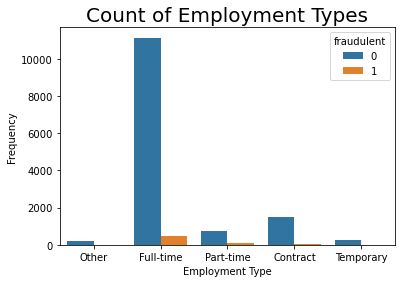

In [10]:
sns.countplot(
    x="employment_type",
    hue="fraudulent",
    data=fake_jobs
)
plt.xlabel("Employment Type")
plt.ylabel("Frequency")
plt.title("Count of Employment Types", fontsize=20)
plt.show()

We observe that most of the fake jobs are full-time jobs. So, the relationship between `employment_type` and `fraudulent` is ambigious such that the peak value for both values, fraud and legitimate jobs, occur when the job is full-time.

Now, lets explore the relation between `has_questions` and `fraudulent` features using a pie chart. Pie chart here is useful to determine the proportions of (`has_question`, `fraudulent`) jobs.

To do that, lets first find the truth table of (`has_question`, `fraudulent`) and frequency of rows that satisfy the truth table.

In [11]:
has_qs_data = pd.DataFrame(fake_jobs.groupby(by=["has_questions", "fraudulent"]))
has_qs_data.columns = ["truth", "group_obj"]

has_qs_data[["has_questions", "fraudulent"]] = pd.DataFrame(has_qs_data["truth"].tolist(), index=has_qs_data.index)

size = []

for i in range(4):
    size.append(has_qs_data.loc[i][1].shape[0])

has_qs_data["size"] = size
has_qs_data.drop(["group_obj"], axis=1, inplace=True)
has_qs_data

,truth,has_questions,fraudulent,size
0,"(0, 0)",0,0,6859
1,"(0, 1)",0,1,432
2,"(1, 0)",1,0,6925
3,"(1, 1)",1,1,193


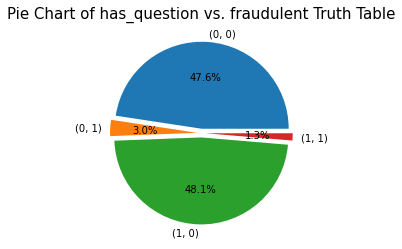

In [12]:
plt.pie(has_qs_data["size"], labels=has_qs_data["truth"], autopct="%1.1f%%", explode=(0.05, 0.05, 0.05, 0.05))
plt.title("Pie Chart of has_question vs. fraudulent Truth Table", fontsize=15)
plt.show()

Based on the above pie chart, we can guess that a job is highly probable to be a legitimate job when it has screening questions. However, most percent of fraud jobs do not have screening questions. 

In a similar fashion, we can analyze the relation between `telecommuting` and `fraudulent` as well.

In [13]:
remote_data = pd.DataFrame(fake_jobs.groupby(by=["telecommuting", "fraudulent"]))
remote_data.columns = ["truth", "group_obj"]

remote_data[["telecommuting", "fraudulent"]] = pd.DataFrame(remote_data["truth"].tolist(), index=remote_data.index)

size = []

for i in range(4):
    size.append(remote_data.loc[i][1].shape[0])

remote_data["size"] = size
remote_data.drop(["group_obj"], axis=1, inplace=True)
remote_data

,truth,telecommuting,fraudulent,size
0,"(0, 0)",0,0,13187
1,"(0, 1)",0,1,596
2,"(1, 0)",1,0,597
3,"(1, 1)",1,1,29


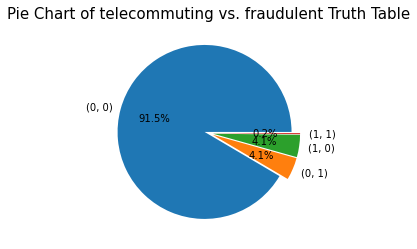

In [14]:
plt.pie(remote_data["size"], labels=remote_data["truth"], autopct="%1.1f%%", explode=(0.05, 0.05, 0.05, 0.05))
plt.title("Pie Chart of telecommuting vs. fraudulent Truth Table", fontsize=15)
plt.show()

From the pie chart above, the ad is highly probable to be a legitimate one when it is not remote. However, we cannot say anything about a job that is remote and fraud at the same time because of its low proportion.

Now, lets explore the relation between the legitimacy of a job and the amount of missing data using a scatterplot.

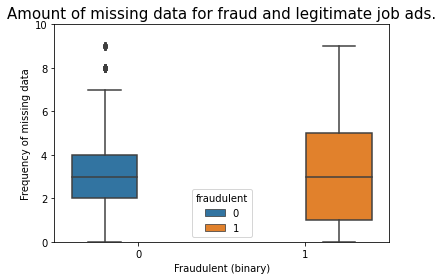

In [15]:
graph = sns.boxplot(
    data=fake_jobs,
    y="no_of_missing_data",
    hue="fraudulent",
    x="fraudulent"
)
plt.ylabel("Frequency of missing data")
plt.xlabel("Fraudulent (binary)")
plt.title("Amount of missing data for fraud and legitimate job ads.", fontsize=15)
graph.set(ylim=(0,10))
plt.show()

Here, we can observe that illegitimate jobs have more missing details about the job than the legitimate ones. In fact, at least one of the fraud job ads have 9 details missing (2 details more than a legitimate job ad). Hence, we can infer that the probability of a job ad being fraud increases as the amount of missing details increases. 

## D. Regression Model

In the EDA section, we saw that there is direct relation of `telecommuting`, `employment_type` and `no_of_missing_data` with `fraudulent` and an indirect one of `has_questions` with `fraudulent`. Now, lets fit a model that would establish a clear relation between our features and the flag and be able to classify any new job ads as fraud or not. Since our output variable (`fraudulent`) is binary, lets choose to train a logistic regression model.

### D.0 Prettifying the data

But before we jump into the regression, lets prettify our dataframe. Lets give discrete numerical values to the discrete string values of `employment_type` so that it can be used in training the model based on the following mapping:

 * Full-time = 4
 * Part-time = 3
 * Contract = 2
 * Temporary = 1
 * Other = 0
    
The numbers have been chosen based on the dedication level of an employee to the company/job.

In [16]:
import sklearn.preprocessing as pp

mapping = ["Other", "Temporary", "Contract", "Part-time", "Full-time"]

le = pp.OrdinalEncoder(categories=[mapping],dtype=np.int_)

fake_jobs[["employment_type"]] = le.fit_transform(fake_jobs[["employment_type"]])

Lets extract the features of interest for training a model.

In [17]:
fake_jobs_for_model = fake_jobs[["telecommuting", "employment_type", "has_questions", "no_of_missing_data", "fraudulent"]]
fake_jobs_for_model.head()

,telecommuting,employment_type,has_questions,no_of_missing_data,fraudulent
0,0,0,0,4,0
1,0,4,0,2,0
3,0,4,0,1,0
4,0,4,1,2,0
6,0,4,1,0,0


### D.1 Splitting the data and standardization

Now, lets split the data into train and test data. First, lets differentiate between our y and x features in the dataframe. Then, we will split our x's and y's into train and test data with `test_size = 20%`.

In [18]:
y = fake_jobs_for_model["fraudulent"]
x = fake_jobs_for_model.drop("fraudulent", axis=1)

print("y.shape = ", y.shape)
print("x.shape = ", x.shape)

y.shape =  (14409,)
x.shape =  (14409, 4)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_prime = scaler.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_prime, y, test_size=0.2)

print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (11527, 4)
x_test.shape =  (2882, 4)
y_train.shape =  (11527,)
y_test.shape =  (2882,)


### D.2 Training the Model 

Here, we will instantiate a LogisticRegression model, train it, and use it to predict values.

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="newton-cg", penalty="l2")

model.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [22]:
predictions = model.predict(x_test)

### D.3 Measuring model performance

Here, we take a look at several measures to evaluate a model's performance.

#### D.3.1 Score of the model

The score of a model is its mean accuracy of predicting positives and negatives correctly.

In [23]:
score = model.score(x_test, y_test)

print("Accuracy of the model = " + str(score * 100) + "%")

Accuracy of the model = 95.45454545454545%


#### D.3.2 Confusion Matrix

A confusion matrix is a matrix that gives us the distribution of true positive and negatives and false negatives and positives.

In [24]:
from sklearn.metrics import confusion_matrix

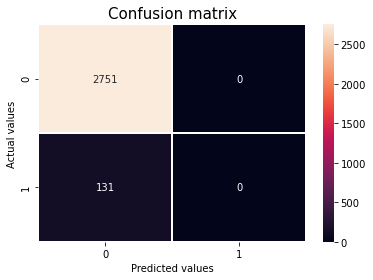

In [25]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    linewidths=0.5
)
plt.ylabel("Actual values")
plt.xlabel("Predicted values")
plt.title("Confusion matrix", fontsize=15)
plt.show()

#### D.3.3 Confusion Matrix Evaluation

In [26]:
tn, fp, fn, tp = cm.ravel()

It is the time interpret meaningful values from the confusion matrix. Confusion matrix plots true negatives, false positives, false negatives, true positives. We can compute several measures using these values.

 * **Accuracy:** It is the number of correct predictions divided by the total number of predictions. Obviously, a high accuracy is good.
 
 $$ Accuracy = \frac{(tp + tn)}{(tp + fp + tn + fn)} $$ 
 
 * **Error rate:** It is the number of times an incorrect value is predicted. Obviously, a low error rate is good.
 
 $$ Error\ rate = \frac{(fp + fn)}{(tp + fp + tn + fn)} $$ 
 
 * **Recall:** It is the number of true positives divided by the total positives. It is also called sensitivity. A high recall value is good because we want to increase the proportion of true positives in total positives.
 
 $$ Recall = \frac{tp}{(tp + fp)} $$ 
 
 * **Specificity:** It is number of true negatives divided by the total negatives. Again, a high specificity value is good because we want to increase the proportion of true negatives in total negatives.
 
 $$ Specificity = \frac{tn}{(tn + fn)} $$ 

**Note:** Here, please note that our model predicts for a fake job ad. That is, a true positive occurs when a model predicts a job ad as fraud and the ad is actually fraud. So, the above measures are oriented accordingly to identify a fake job.

In [27]:
print("Accuracy of the model = ", (tp + tn) / (tp + fp + tn + fn))
print("Error rate of the model = ", (fp + fn) / (tp + fp + tn + fn))
print("Recall of the model = ", tp / (tp + fp))
print("Specificity of the model = ", tn / (tn + fn))

Accuracy of the model =  0.9545454545454546
Error rate of the model =  0.045454545454545456
Recall of the model =  nan
Specificity of the model =  0.9545454545454546


<ipython-input-27-dae7227a37c2>:3: RuntimeWarning: invalid value encountered in long_scalars
  print("Recall of the model = ", tp / (tp + fp))


Above, the recall value is `NaN`. Actually, it is `0/0` because we have `tp = 0` and `fp = 0` from the matrix.

We saw that we have 0 positive cases. This means that our model was not able to classify a fake job ad at all. This happens because our data is imbalanced. In the information about the dataset, we saw that we have 866 fake job ad against 17,014 legitimates ones. Furthermore, we dropped some records while cleaning the data set. So, our model could not observe a fake job ad more. That is why our model predicts "not a fake" job (true negative) more accurately from the confusion matrix.

#### D.3.4 Receiver Operating Characteristic (ROC) Curve

An ROC curve is a graph showing true positive rate vs. false positive rate. It is a tradeoff of recall and specificity. Area under the ROC Curve (AUC) is score that determines the worthness of the classifier. Where the AUC score of 1 represents a perfect classifier, the AUC score of 0.5 is worthless. So, we want our AUC score to be `0.5 < AUC Score <= 1`.

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

y_pred_proba = model.predict_proba(x_test)[::,1]
false_pos_rate, true_pos_rate, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

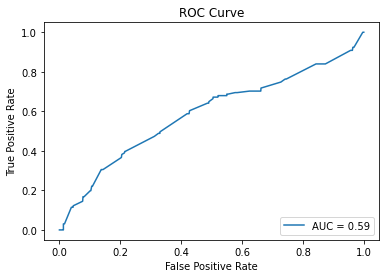

In [29]:
roc_graph = RocCurveDisplay(fpr=false_pos_rate,tpr=true_pos_rate, roc_auc=auc)
roc_graph.plot()
plt.title("ROC Curve")
plt.show()

Our AUC score is 0.59 which is fair. The value falls in the desired interval above. It would have been closer to 1 if the dataset was balanced.

#### D.3.5 Feature Importance

Now, lets examine the contribution of each feature to the classification.

In [30]:
importance = model.coef_[0]
for i, v in enumerate(importance):
    print("Feature: %0d, Score: %0.5f" % (i,v))

Feature: 0, Score: 0.06409
Feature: 1, Score: 0.00775
Feature: 2, Score: -0.39955
Feature: 3, Score: 0.08630


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


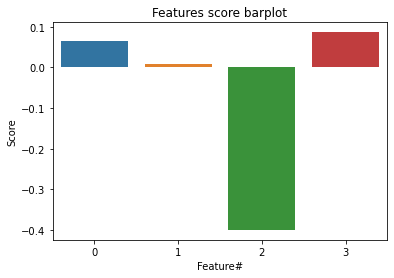

In [31]:
sns.barplot([x for x in range(len(importance))], importance)
plt.xlabel("Feature#")
plt.ylabel("Score")
plt.title("Features score barplot")
plt.show()

Here, note that since our model is a classification kind, a postive score means that that feature predicts 1 (true) for 1 input and a negative score means that that feature predicts 0 (false) for 1 input. Feature 0 is `telecommuting`, feature 1 is `employment_type`, feature 2 is `has_questions`, and feature 3 is `no_of_missing_data`. We see that feature 2 is the highest contributing feature. Its negative score means that when there are screening questions, the job is highly likely to be a legitimate (not fraud or 0) one. Then, the feature 1 is `employment_type` which is categorical. Here, our model tries to categorize a full-time job as a fake one with a positive score. This is an ambigious relation because we saw in EDA that the most of both, legitimate and fake, jobs were full-time. But, the ratio of full-time jobs in fake jobs was more than the ratio of full-time jobs in legitimate jobs. So, our model always has a small instinct (smal positive score) that a full-time could be fake. This interpretation is because we labelled full-time job as 4 and so on.

Connecting our EDA section with the observation, we predicted in the EDA section that a job is likely to a legitimate one when it is not remote, has screening questions, and has less amount of missing details. Our corresponding scores for these features proves our prediction. We also predicted the ambiguity in the relation of feature 1 and `fraudulent`. From a very small positive score of feature 1, we can infer that it is not a big classification factor. It has been influenced to be positive because of the ratio of full-time jobs in the fake ones.

## E. Conclusion

To determine the legitimacy of a job, we performed exploratory data analysis and logistic regression on our data. In EDA, we predicted a direct relation of features 0, 1, and 3 with `fraudulent` and an inverse relation of feature 2 with `fraudulent`. The regression model feature scores established that there is indeed a direct relation of features 0 and 3 and an indirect relation of feature 2 with `fraudulent`. Moreover, the feature 1 has still an ambiguous relationship with `fraudulent`. A possible reason for this ambiguity is that our dataset was imbalanced. Our model observed less amount of fake job ads. So, we need a more balanced dataset to make our classifier more accurate. This dataset is insufficient for the classification model. Even with this dataset, we able to achieve an accuracy of 95.45% and an AUC score of 0.59 which is fair. But, our model never predicted a fraud job at all. We can perform better with a better dataset. To conclude about the relation of features with the legitimacy of a job, a job is likely to be legitimate when it has screening questions, is not remote, is full-time, and less amount of missing details. Again, our dataset was imbalanced because of which our model scores and confusion matrix predicted legitimate job ad. This severly imbalanced dataset cannot be used further for data science analysis. We have not successfully and convincingly established a relation between the features. A better dataset is needed to improve our model's metrics.